In [1]:
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools, rdMolDescriptors
import pandas as pd

In [2]:
print('rdkit version: ', rdBase.rdkitVersion)

rdkit version:  2021.03.5


In [3]:
print('pandas version: ', pd.__version__)

pandas version:  1.3.2


In [4]:
!python -V

Python 3.9.6


In [5]:
df = PandasTools.LoadSDF('PubChem_substance_cache_EFe39joXX6togV2Y3-AUtxVK3iqCYnpRAHRhHRtlcxwbfE8_records.sdf')

,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_GENERIC_REGISTRY_NAME
0,0,0,354335558,1,TCI (Tokyo Chemical Industry),A3190,4-[1-Hydroxy-2-[[6-(4-phenylbutoxy)hexyl]amino...,A3190,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,56801 1\n5152 2\n6844 2,1\n3,354335558,,NaN,NaN,NaN
1,0,0,354335473,1,TCI (Tokyo Chemical Industry),C3355,2-Chloro-4-(trifluoromethyl)phenol\nC3355,C3355,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,2736603 1,1\n3,354335473,,NaN,NaN,NaN
2,0,0,354335166,1,TCI (Tokyo Chemical Industry),A3133,4-[(7-Chloroquinolin-4-yl)amino]-2-[(diethylam...,A3133,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,6246 1\n313 2\n2165 2,1\n3,354335166,,NaN,NaN,NaN
3,0,0,354334589,1,TCI (Tokyo Chemical Industry),A1827,1-(trans-4-Amylcyclohexyl)-4-hydroxybenzene\n1...,A1827,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,4593765 1,1\n3,354334589,,3 2 6\n8 14 5,NaN,NaN
4,0,0,354334487,1,TCI (Tokyo Chemical Industry),D5160,"2,4-Dibromo-6-[(E)-[[(1R,2R)-2-(isoindolin-2-y...",D5160,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,137247309 1,1\n3,354334487,,6 8 5\n7 13 6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,87558359,4,TCI (Tokyo Chemical Industry),A1885,"2-(1,1-Dimethylpropyl)phenol\n2-tert-Amylpheno...",A1885,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,76769 1,1\n3,87558359,,NaN,Select a region for detailed information:\n&lt...,3279-27-4
113,0,0,87558322,4,TCI (Tokyo Chemical Industry),B2741,2-(4-Butylbenzylidene)-4'-hydroxyacetophenone\...,B2741,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,44629782 1,1\n3,87558322,,NaN,Select a region for detailed information:\n&lt...,385810-21-9
114,0,0,87558311,4,TCI (Tokyo Chemical Industry),D3294,"120-95-6\n2,4-Bis(1,1-dimethylpropyl)phenol\n2...",D3294,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,8455 1,1\n3,87558311,,NaN,Select a region for detailed information:\n&lt...,120-95-6
115,0,0,87558282,4,TCI (Tokyo Chemical Industry),P1610,108-95-2\nP1610\nPhenol,P1610,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,996 1,1\n3,87558282,,NaN,Select a region for detailed information:\n&lt...,108-95-2

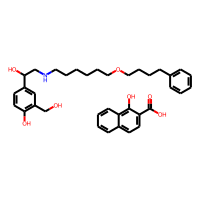
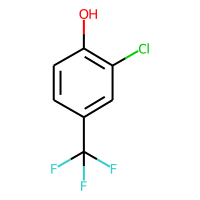
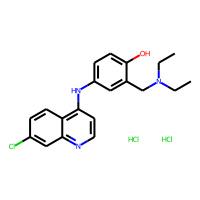
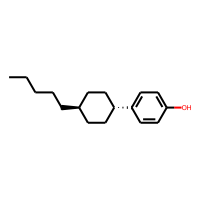
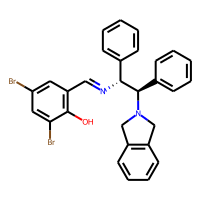
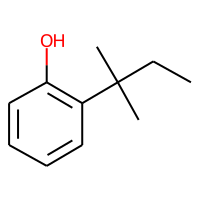
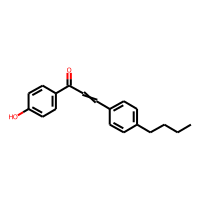
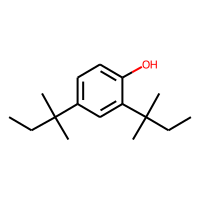
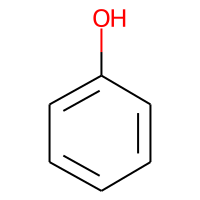
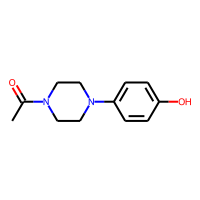

In [6]:
df

In [7]:
df.columns

Index(['PUBCHEM_COMPOUND_ID_TYPE', 'PUBCHEM_TOTAL_CHARGE',
       'PUBCHEM_SUBSTANCE_ID', 'PUBCHEM_SUBSTANCE_VERSION',
       'PUBCHEM_EXT_DATASOURCE_NAME', 'PUBCHEM_EXT_DATASOURCE_REGID',
       'PUBCHEM_SUBSTANCE_SYNONYM', 'PUBCHEM_XREF_EXT_ID',
       'PUBCHEM_EXT_DATASOURCE_URL', 'PUBCHEM_EXT_SUBSTANCE_URL',
       'PUBCHEM_CID_ASSOCIATIONS', 'PUBCHEM_COORDINATE_TYPE', 'ID', 'ROMol',
       'PUBCHEM_BONDANNOTATIONS', 'PUBCHEM_SUBSTANCE_COMMENT',
       'PUBCHEM_GENERIC_REGISTRY_NAME'],
      dtype='object')

In [8]:
df2 = df[['ID', 'ROMol']]

,ID,ROMol
0,354335558,
1,354335473,
2,354335166,
3,354334589,
4,354334487,
...,...,...
112,87558359,
113,87558322,
114,87558311,
115,87558282,

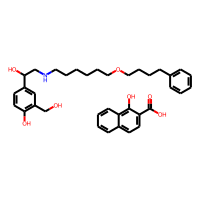
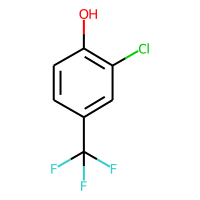
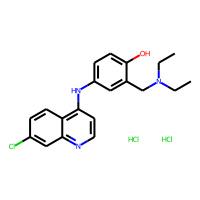
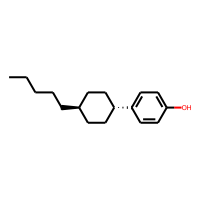
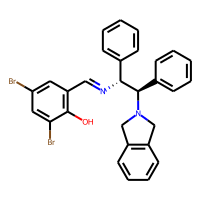
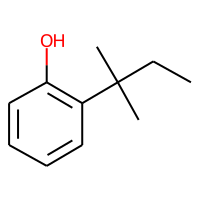
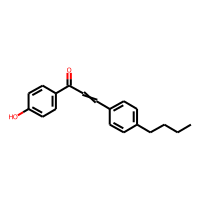
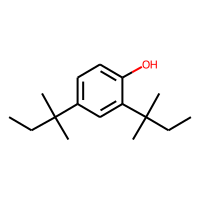
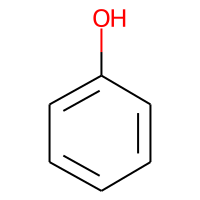
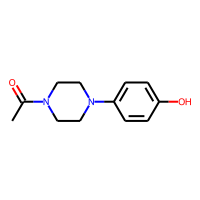

In [9]:
df2

In [10]:
from rdkit.Chem import MolStandardize

lfc = MolStandardize.fragment.LargestFragmentChooser()

In [11]:
df2['mol'] = df2['ROMol'].map(lfc)

/var/folders/bp/tcp_cwbd38j0x8vff4f1k_fh0000gn/T/ipykernel_4615/1089578225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mol'] = df2['ROMol'].map(lfc)


,ID,ROMol,mol
0,354335558,,
1,354335473,,
2,354335166,,
3,354334589,,
4,354334487,,
...,...,...,...
112,87558359,,
113,87558322,,
114,87558311,,
115,87558282,,

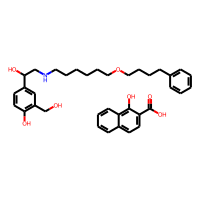
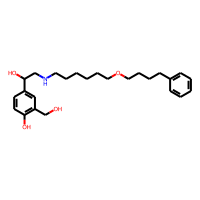
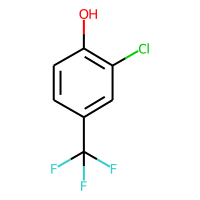
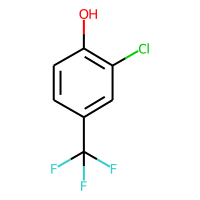
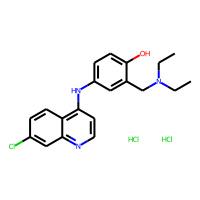
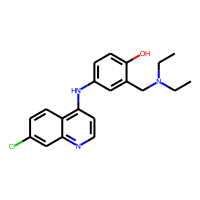
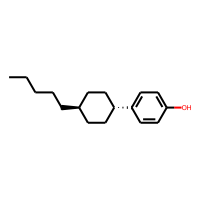
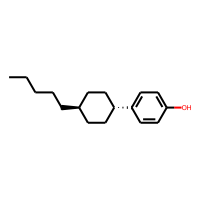
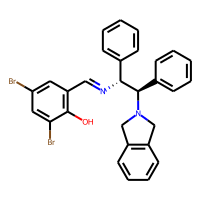
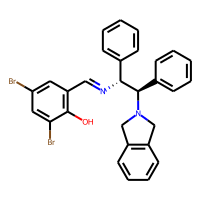
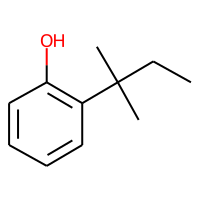
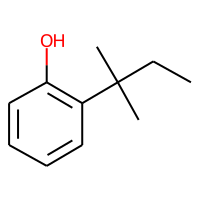
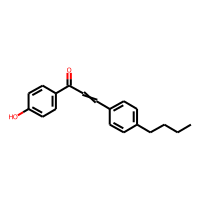
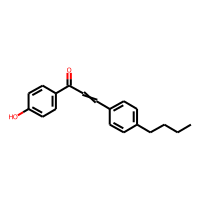
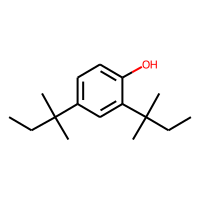
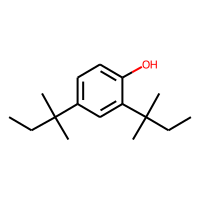
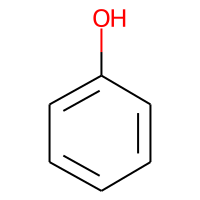
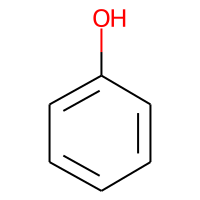
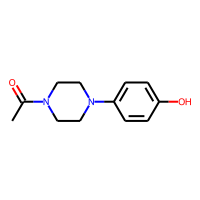
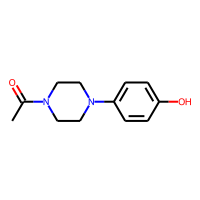

In [12]:
df2

In [13]:
df2.count()

ID       117
ROMol    117
mol      117
dtype: int64

/var/folders/bp/tcp_cwbd38j0x8vff4f1k_fh0000gn/T/ipykernel_4615/1048418456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Smiles"] = df2["mol"].map(Chem.MolToSmiles)


,ID,ROMol,mol,Smiles
0,354335558,,,OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O
1,354335473,,,Oc1ccc(C(F)(F)F)cc1Cl
2,354335166,,,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O
3,354334589,,,CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
4,354334487,,,Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...
...,...,...,...,...
112,87558359,,,CCC(C)(C)c1ccccc1O
113,87558322,,,CCCCc1ccc(C=CC(=O)c2ccc(O)cc2)cc1
114,87558311,,,CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1
115,87558282,,,Oc1ccccc1

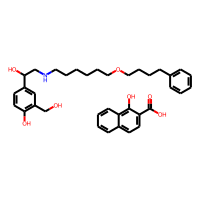
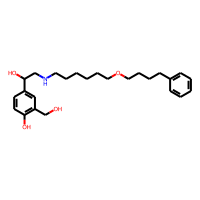
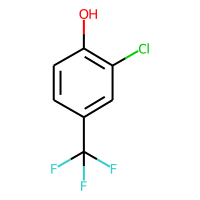
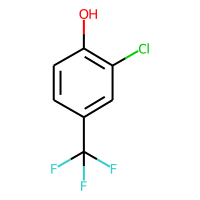
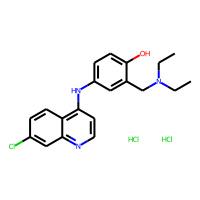
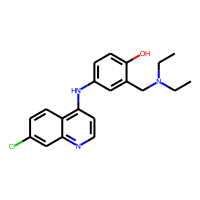
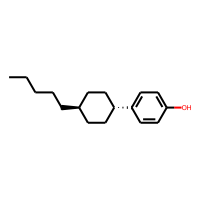
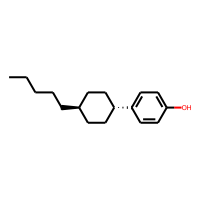
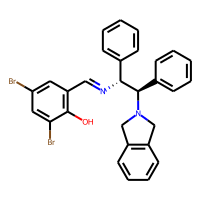
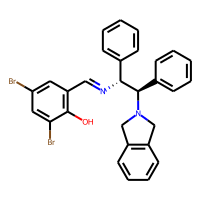
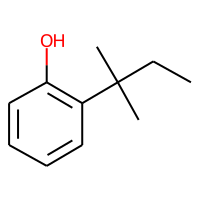
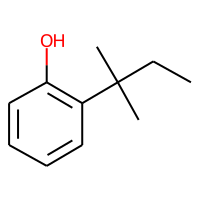
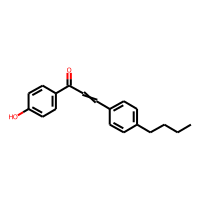
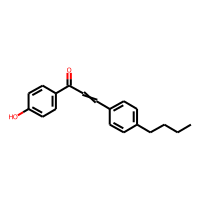
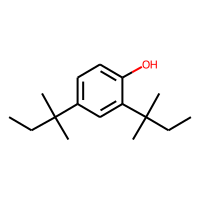
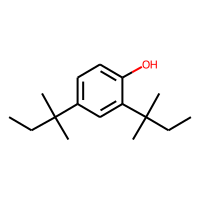
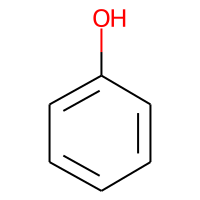
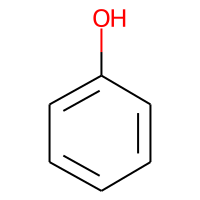
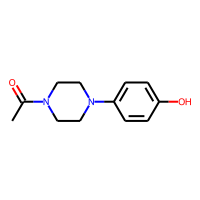
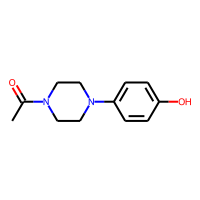

In [14]:
df2["Smiles"] = df2["mol"].map(Chem.MolToSmiles)
df2

In [15]:
df2.count()

ID        117
ROMol     117
mol       117
Smiles    117
dtype: int64

,ID,ROMol,mol,Smiles
56,87574359,,,O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21
57,87574358,,,O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21
114,87558311,,,CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1

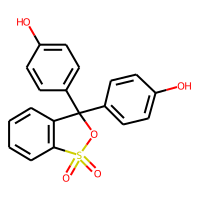
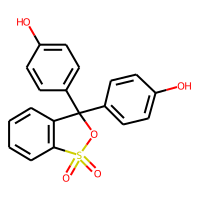
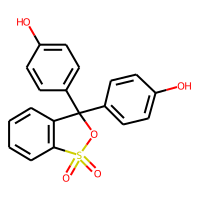
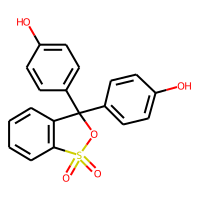
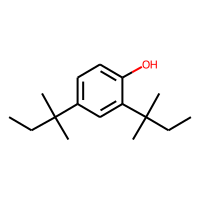
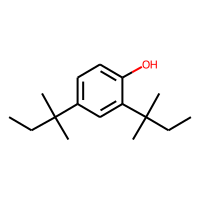

In [16]:
df2[df2.duplicated(subset=['Smiles'])]

,ID,ROMol,mol,Smiles
7,354334285,,,CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1
114,87558311,,,CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1

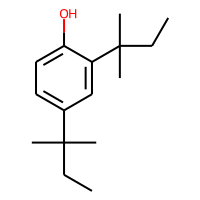
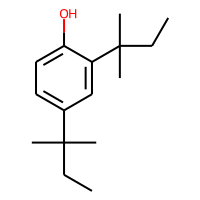
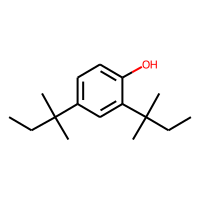
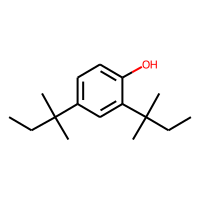

In [17]:
df2.loc[df2['Smiles']=='CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1']

,ID,ROMol,mol,Smiles
52,87574854,,,O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21
56,87574359,,,O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21
57,87574358,,,O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21

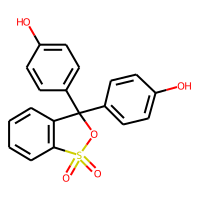
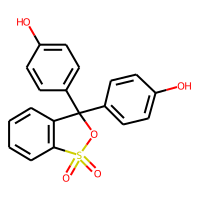
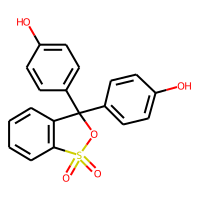
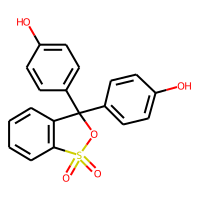
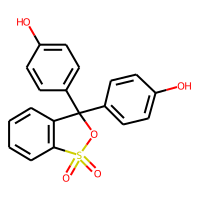
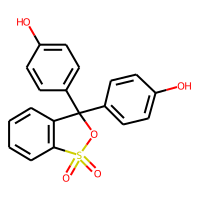

In [18]:
df2.loc[df2['Smiles']=='O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21']

In [19]:
df2["Smiles"].unique

<bound method Series.unique of 0                 OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O
1                                  Oc1ccc(C(F)(F)F)cc1Cl
2                 CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O
3                     CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
4      Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...
                             ...                        
112                                   CCC(C)(C)c1ccccc1O
113                    CCCCc1ccc(C=CC(=O)c2ccc(O)cc2)cc1
114                      CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1
115                                            Oc1ccccc1
116                          CC(=O)N1CCN(c2ccc(O)cc2)CC1
Name: Smiles, Length: 117, dtype: object>

,ID,ROMol,mol,Smiles
0,354335558,,,OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O
1,354335473,,,Oc1ccc(C(F)(F)F)cc1Cl
2,354335166,,,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O
3,354334589,,,CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
4,354334487,,,Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...
...,...,...,...,...
111,87558366,,,CC(C)(c1ccccc1)c1ccc(O)c(C(C)(C)c2ccccc2)c1
112,87558359,,,CCC(C)(C)c1ccccc1O
113,87558322,,,CCCCc1ccc(C=CC(=O)c2ccc(O)cc2)cc1
115,87558282,,,Oc1ccccc1

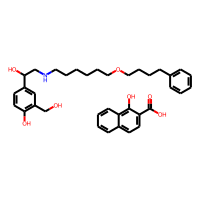
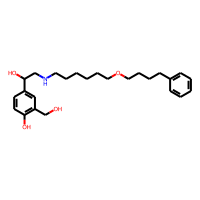
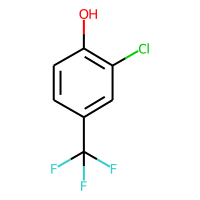
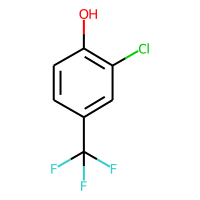
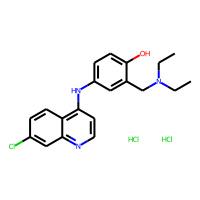
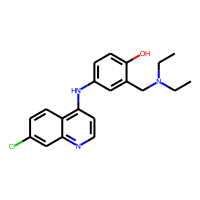
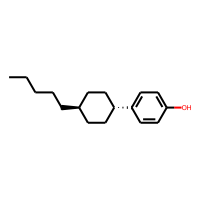
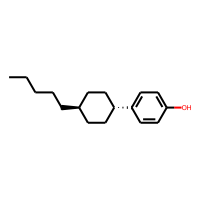
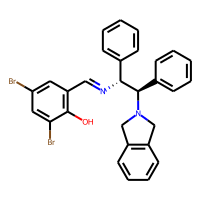
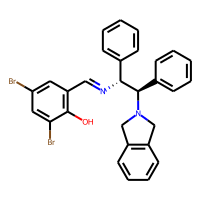
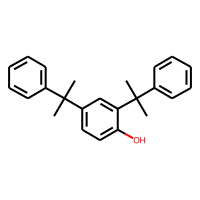
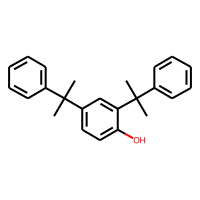
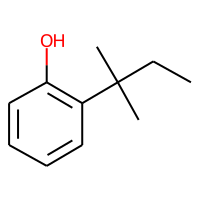
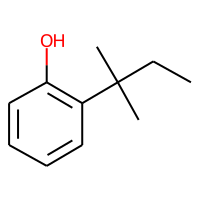
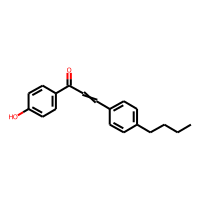
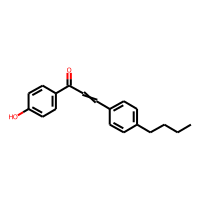
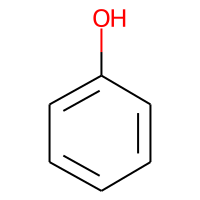
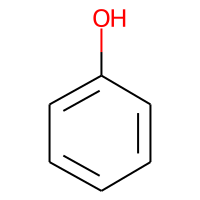
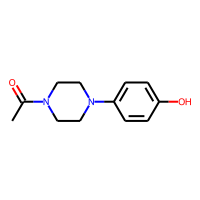
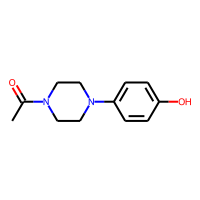

In [20]:
df3 = df2[~df2.duplicated(subset=['Smiles'])]
df3

In [21]:
df3.count()

ID        114
ROMol     114
mol       114
Smiles    114
dtype: int64

,ID,mol,Smiles
0,354335558,,OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O
1,354335473,,Oc1ccc(C(F)(F)F)cc1Cl
2,354335166,,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O
3,354334589,,CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
4,354334487,,Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...
...,...,...,...
111,87558366,,CC(C)(c1ccccc1)c1ccc(O)c(C(C)(C)c2ccccc2)c1
112,87558359,,CCC(C)(C)c1ccccc1O
113,87558322,,CCCCc1ccc(C=CC(=O)c2ccc(O)cc2)cc1
115,87558282,,Oc1ccccc1

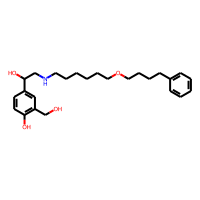
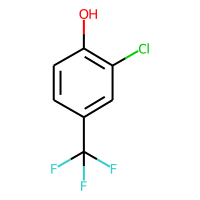
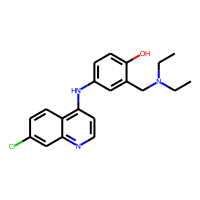
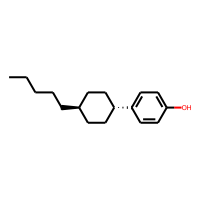
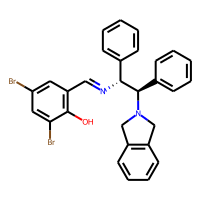
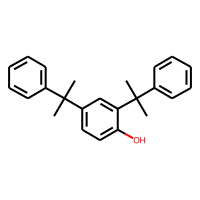
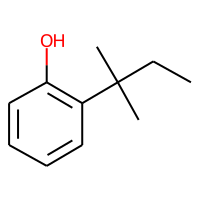
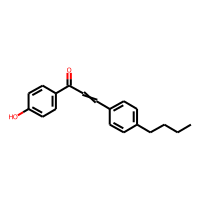
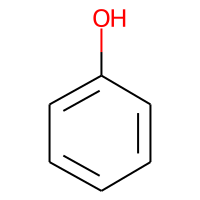
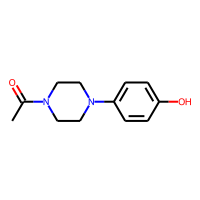

In [22]:
df4 = df3.drop("ROMol", axis=1)
df4

In [23]:
pd.get_option("display.max_rows")

60

,ID,mol,Smiles
0,354335558,,OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O
1,354335473,,Oc1ccc(C(F)(F)F)cc1Cl
2,354335166,,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O
3,354334589,,CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
4,354334487,,Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...
5,354334379,,CCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
6,354334324,,CCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
7,354334285,,CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1
8,354333335,,Oc1ccc(F)cc1-c1ccno1
9,253662272,,Oc1ccccc1-c1cc[nH]n1

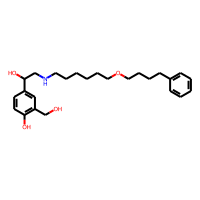
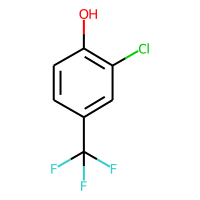
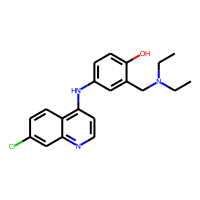
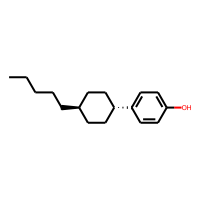
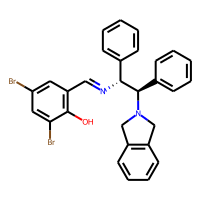
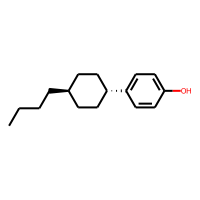
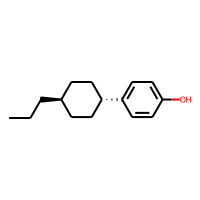
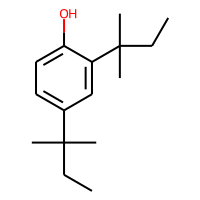
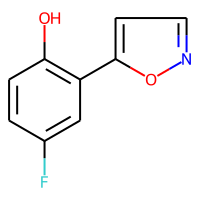
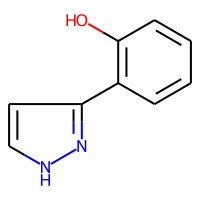
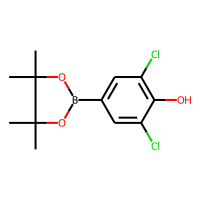
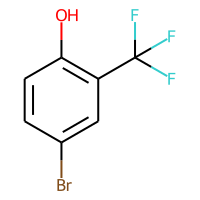
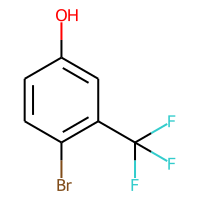
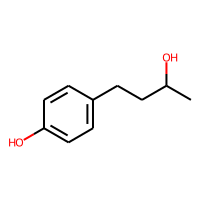
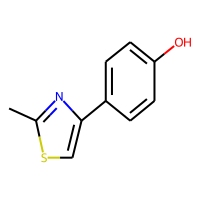
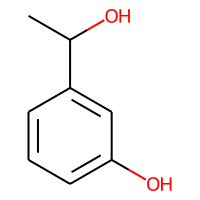
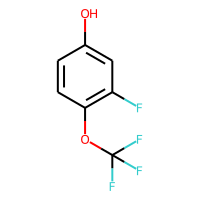
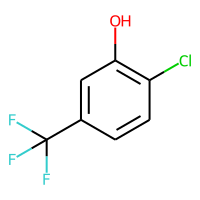
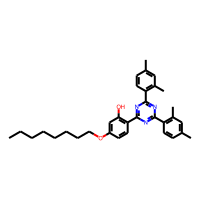
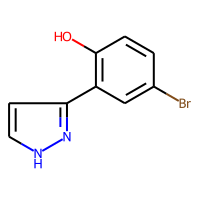
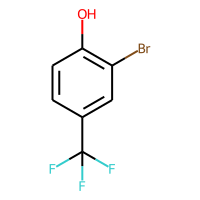
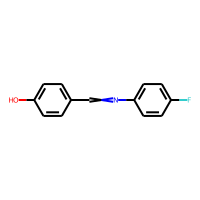
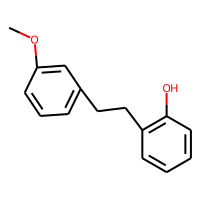
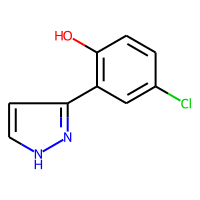
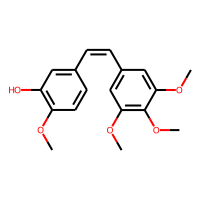
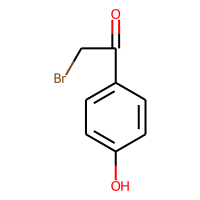
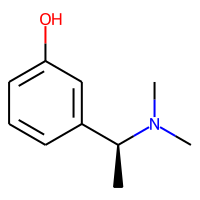
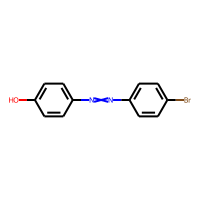
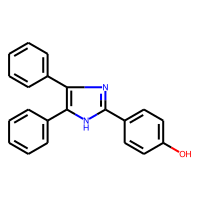
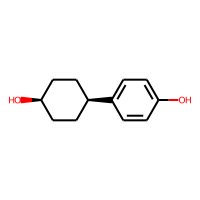
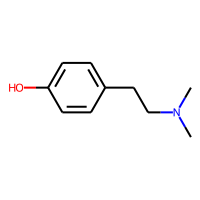
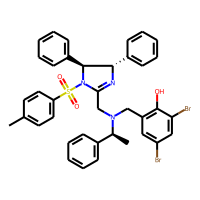
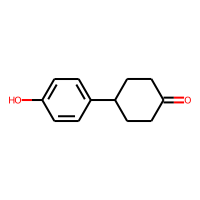
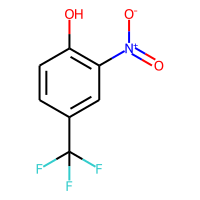
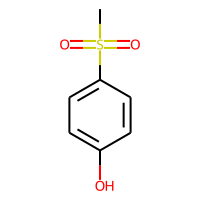
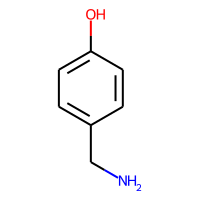
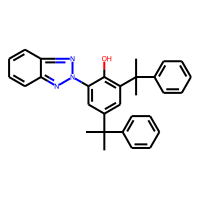
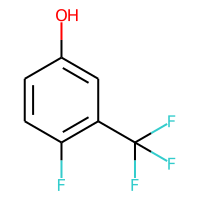
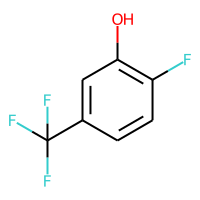
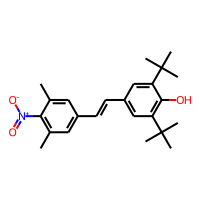
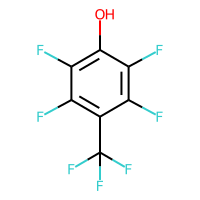
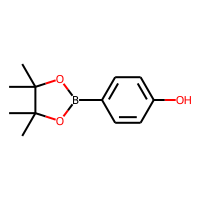
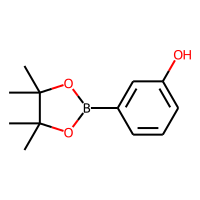
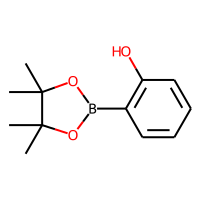
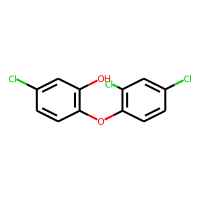
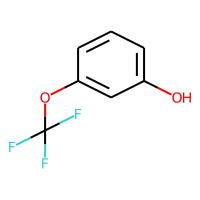
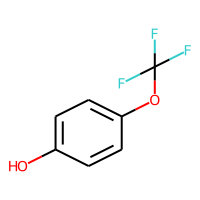
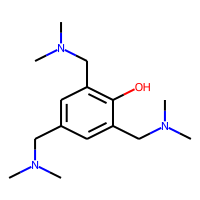
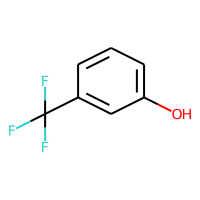
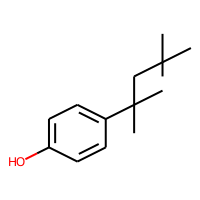
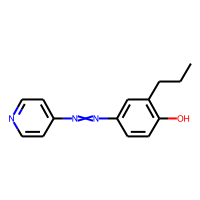
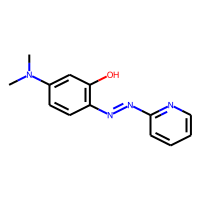
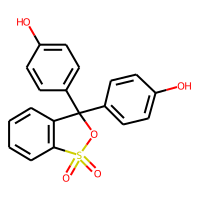
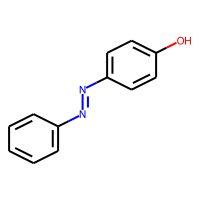
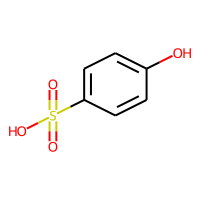
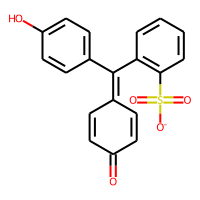
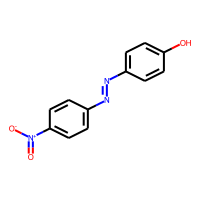
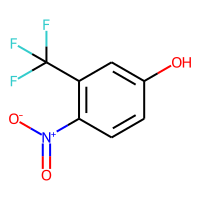
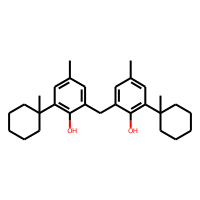
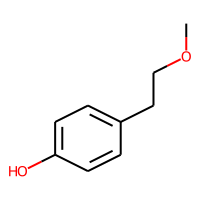
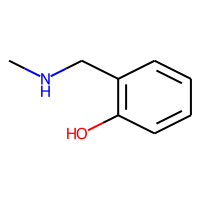
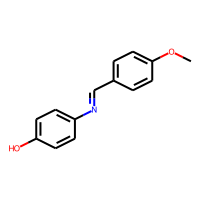
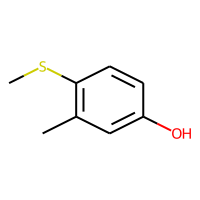
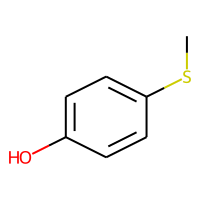
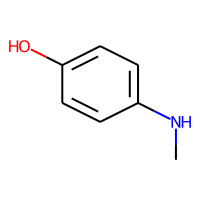
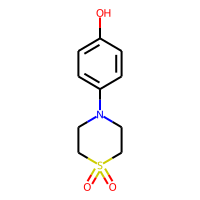
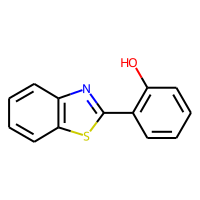
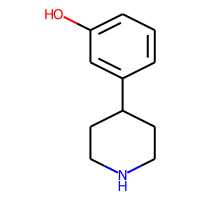
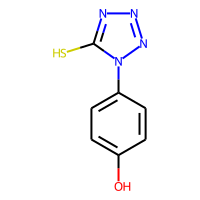
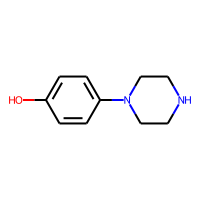
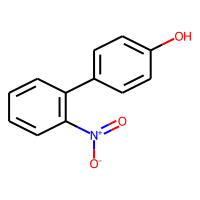
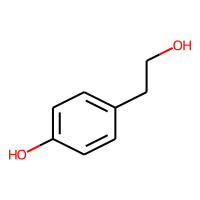
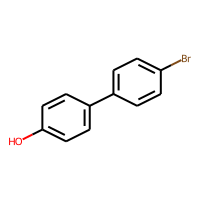
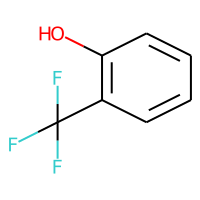
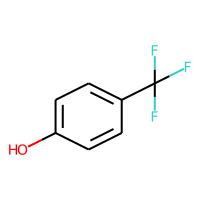
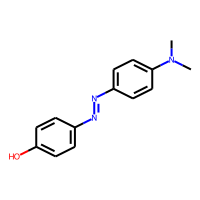
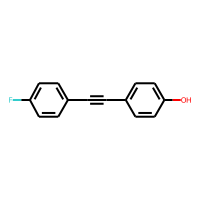
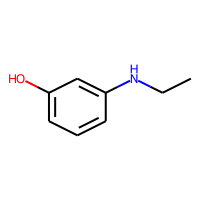
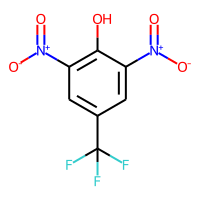
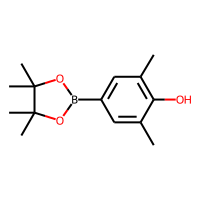
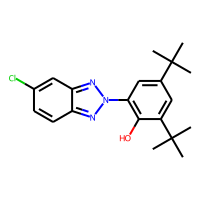
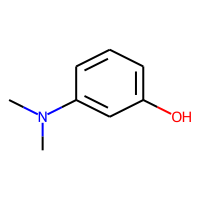
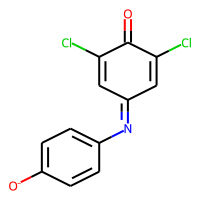
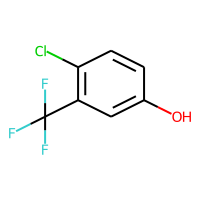
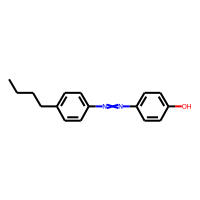
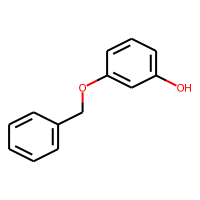
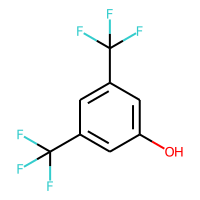
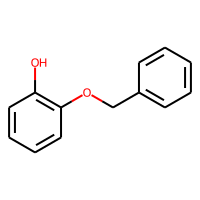
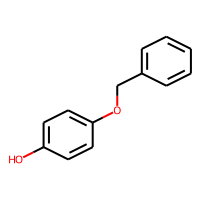
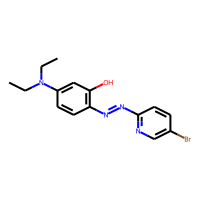
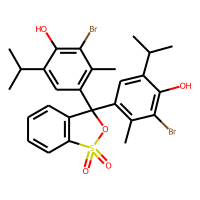
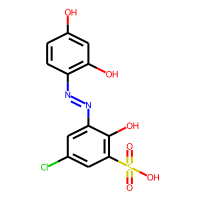
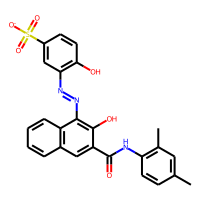
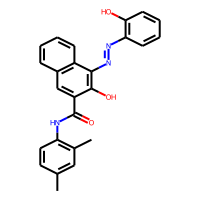
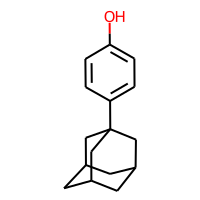
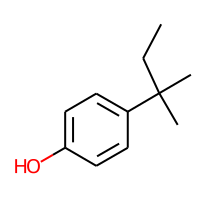
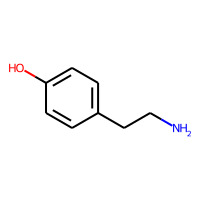
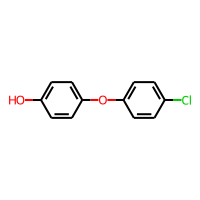
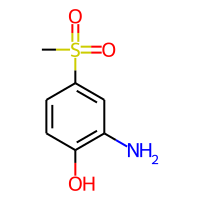
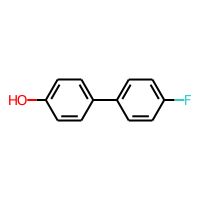
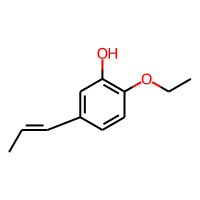
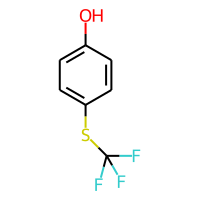
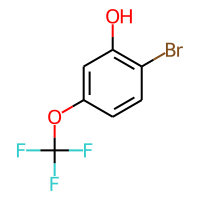
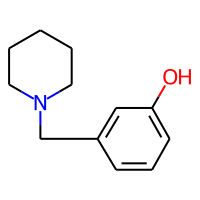
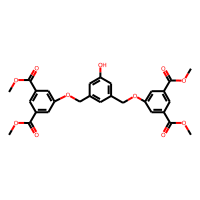
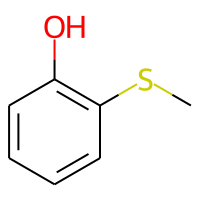
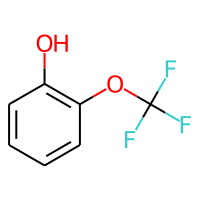
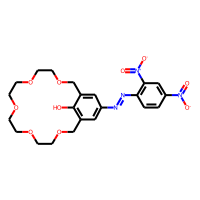
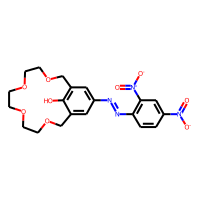
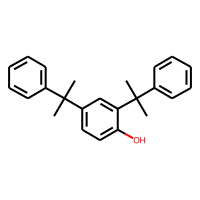
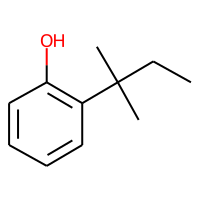
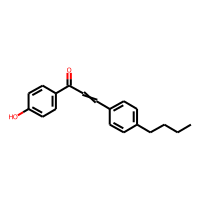
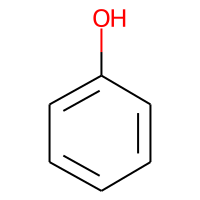
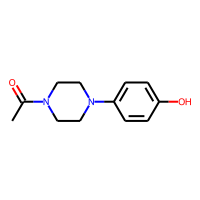

In [24]:
pd.set_option('display.max_rows', 150)
df4

In [25]:
df4['MolWt'] = df4["mol"].map(rdMolDescriptors._CalcMolWt)

,ID,mol,Smiles,MolWt
18,253661036,,CCCCCCCCOc1ccc(-c2nc(-c3ccc(C)cc3C)nc(-c3ccc(C...,509.694
106,87559347,,COC(=O)c1cc(OCc2cc(O)cc(COc3cc(C(=O)OC)cc(C(=O...,538.505
4,354334487,,Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...,576.332
92,87563318,,Cc1c(C2(c3cc(C(C)C)c(O)c(Br)c3C)OS(=O)(=O)c3cc...,624.391
31,160871098,,Cc1ccc(S(=O)(=O)N2C(CN(Cc3cc(Br)cc(Br)c3O)[C@@...,773.591

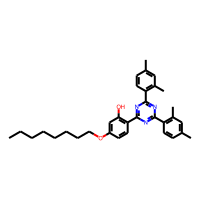
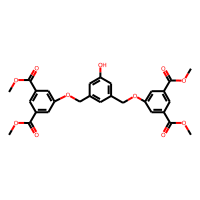
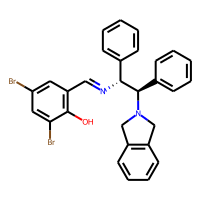
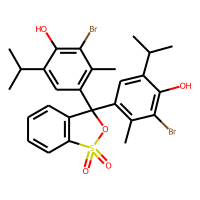
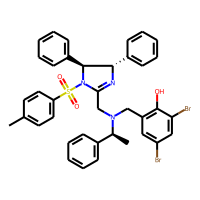

In [26]:
df5 = df4.sort_values("MolWt")
df5.tail()

<AxesSubplot:>

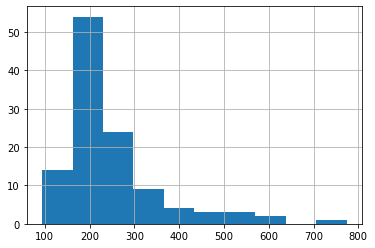

In [27]:
df5["MolWt"].hist()

In [28]:
df5['TPSA'] = df5["mol"].map(rdMolDescriptors.CalcTPSA)

,ID,mol,Smiles,MolWt,TPSA
115,87558282,,Oc1ccccc1,94.113,20.23
35,135727020,,NCc1ccc(O)cc1,123.155,46.25
66,87572246,,CNc1ccc(O)cc1,123.155,32.26
98,87561955,,NCCc1ccc(O)cc1,137.182,46.25
79,87569780,,CCNc1cccc(O)c1,137.182,32.26
62,87572981,,CNCc1ccccc1O,137.182,32.26
83,87567299,,CN(C)c1cccc(O)c1,137.182,23.47
15,253661621,,CC(O)c1cccc(O)c1,138.166,40.46
73,87571087,,OCCc1ccc(O)cc1,138.166,40.46
65,87572498,,CSc1ccc(O)cc1,140.207,20.23

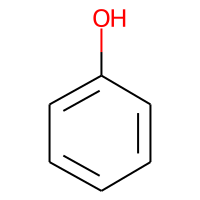
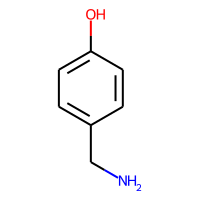
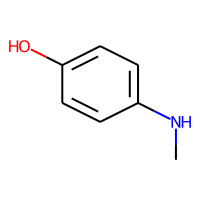
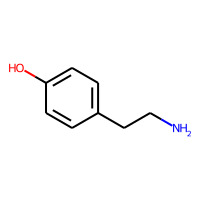
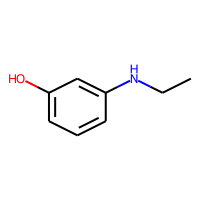
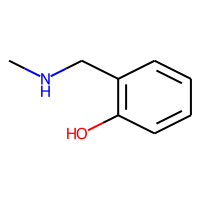
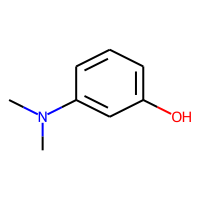
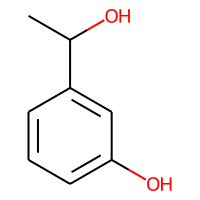
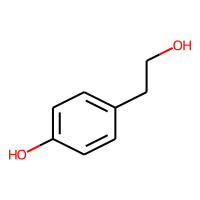
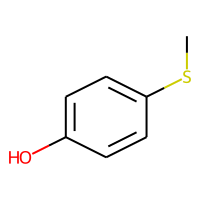
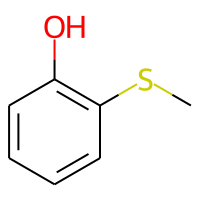
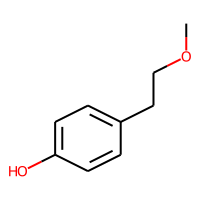
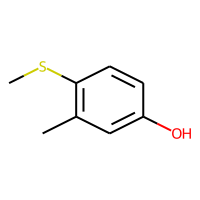
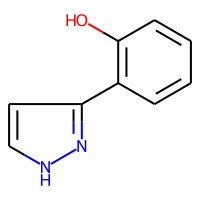
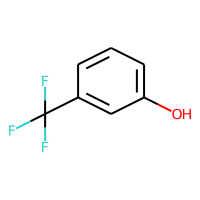
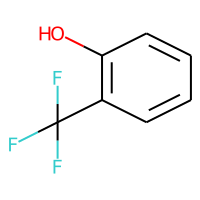
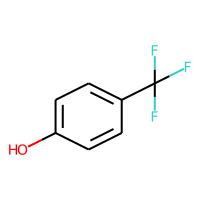
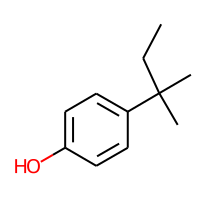
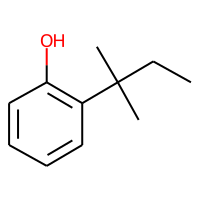
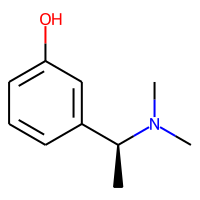
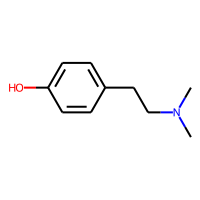
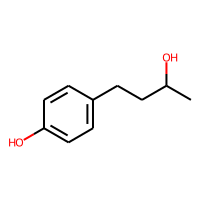
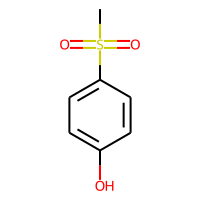
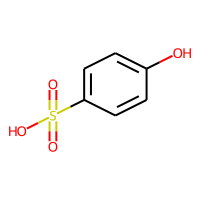
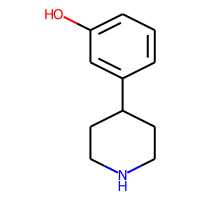
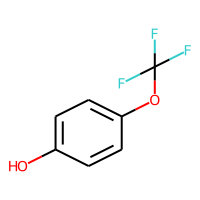
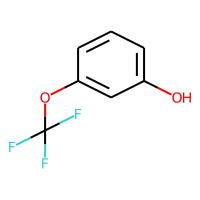
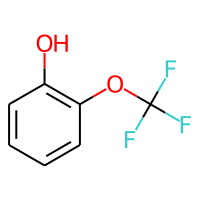
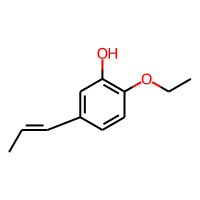
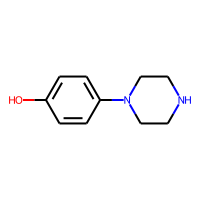
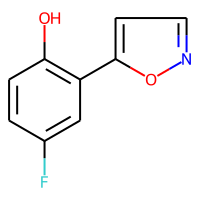
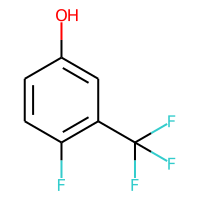
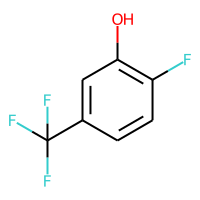
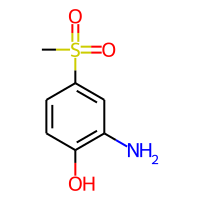
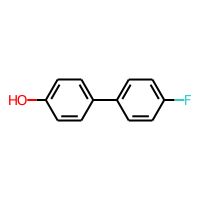
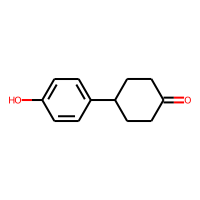
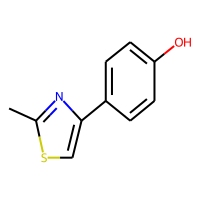
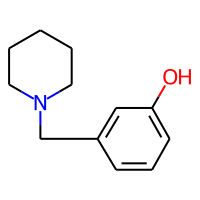
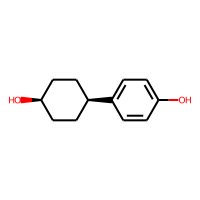
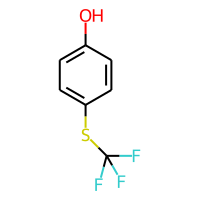
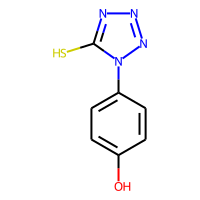
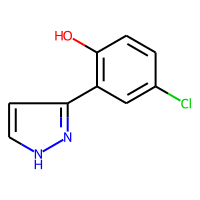
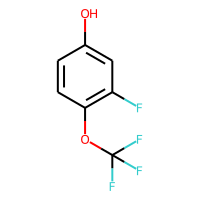
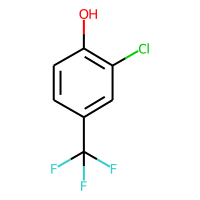
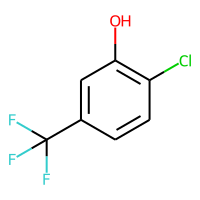
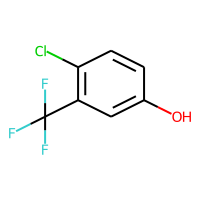
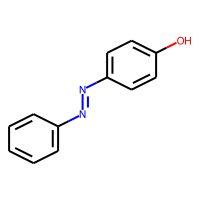
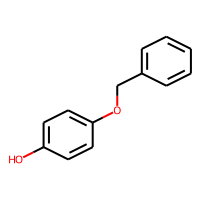
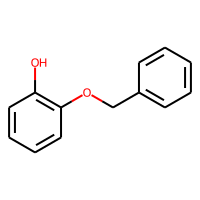
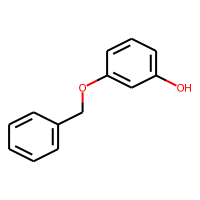
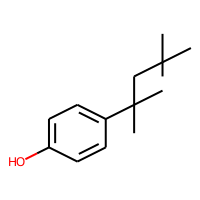
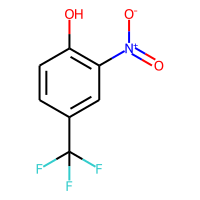
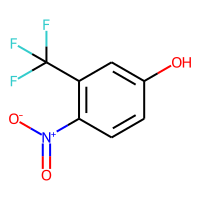
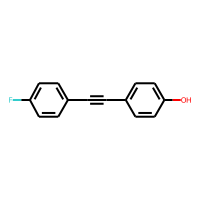
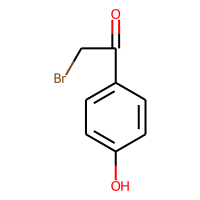
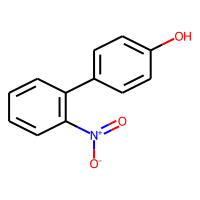
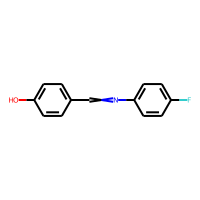
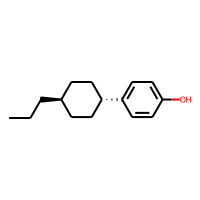
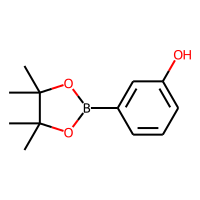
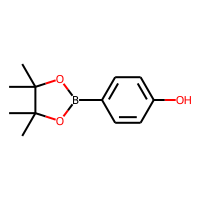
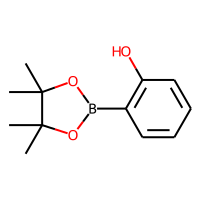
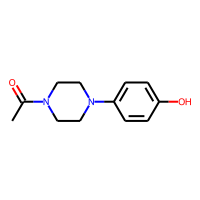
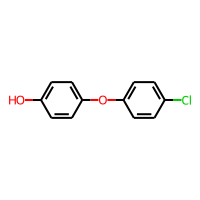
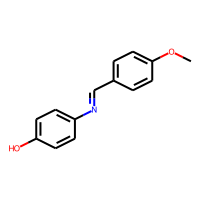
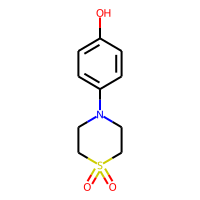
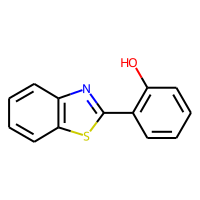
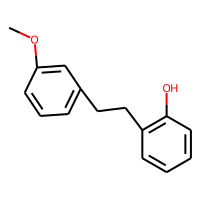
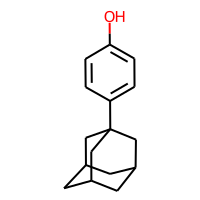
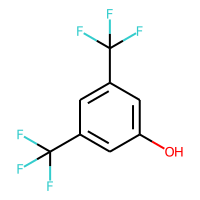
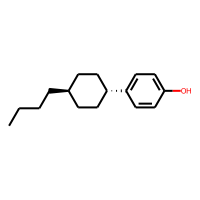
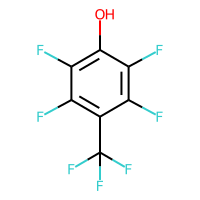
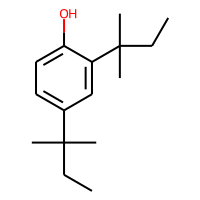
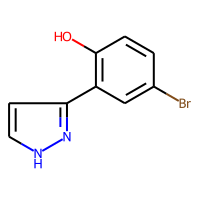
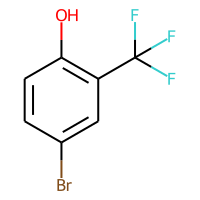
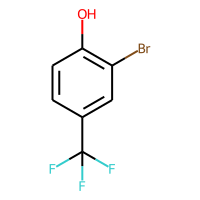
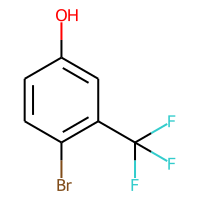
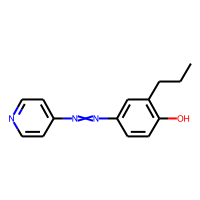
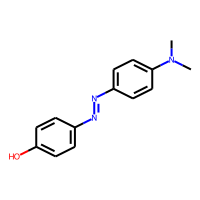
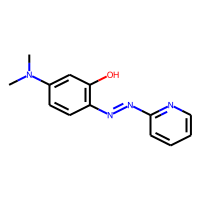
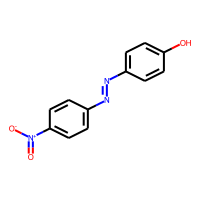
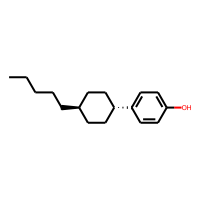
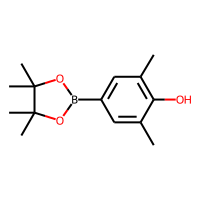
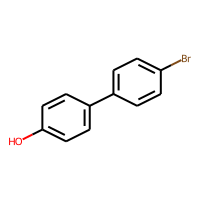
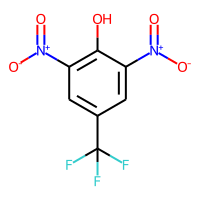
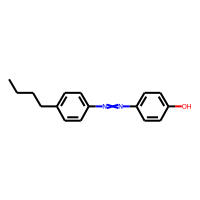
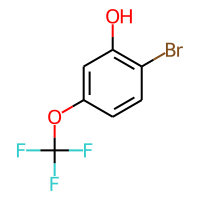
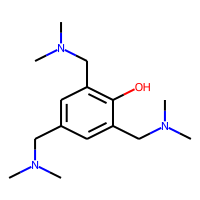
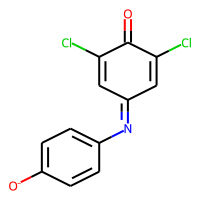
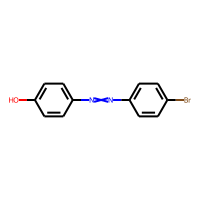
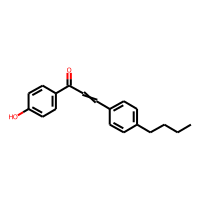
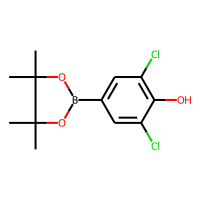
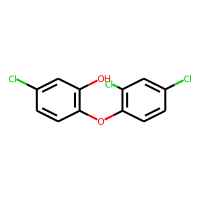
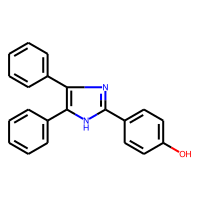
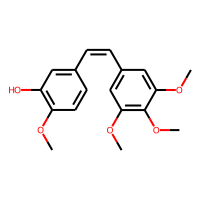
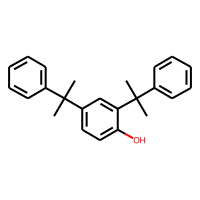
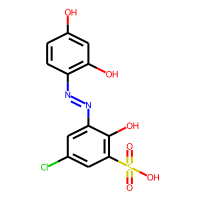
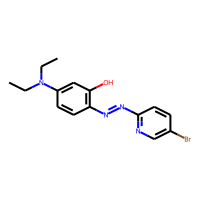
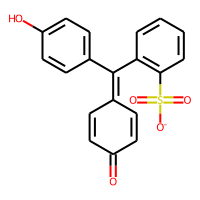
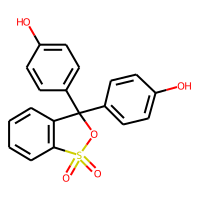
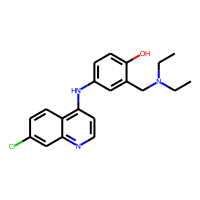
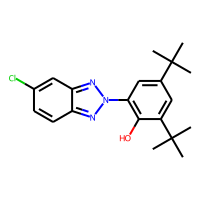
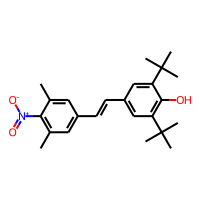
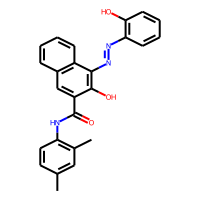
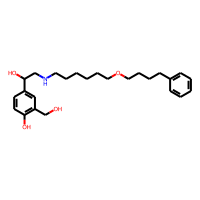
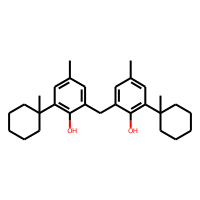
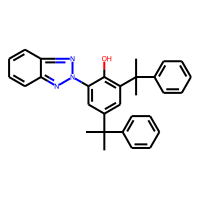
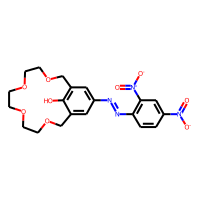
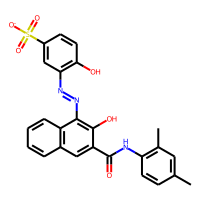
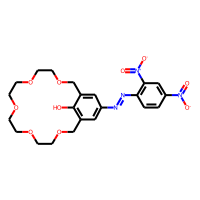
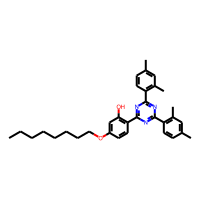
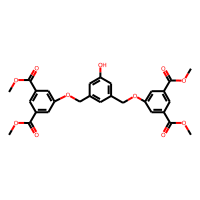
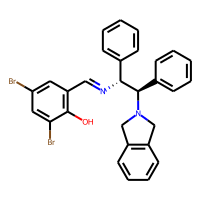
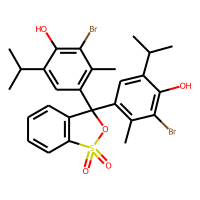
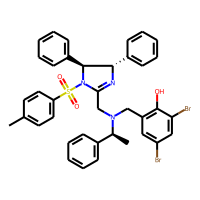

In [29]:
df5

<AxesSubplot:xlabel='MolWt', ylabel='TPSA'>

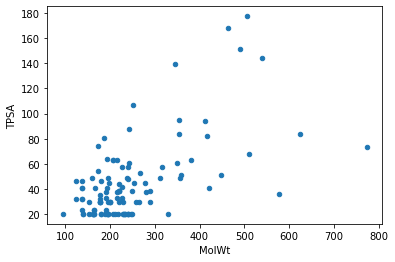

In [30]:
df5.plot(x="MolWt", y="TPSA", kind="scatter")

In [31]:
df5.describe()

,MolWt,TPSA
count,114.000000,114.000000
mean,246.422754,44.761404
std,112.659419,31.131572
min,94.113000,20.230000
25%,178.232000,20.230000
50%,216.783500,36.565000
75%,256.337000,50.940000
max,773.591000,177.380000
